In [12]:
import numpy as np
import shapely
import bisect
import shapely.wkt
import matplotlib.pyplot as plt
import math
import geopandas as gpd
import json
import pandas as pd
import seaborn as sns
from enum import Enum


from bench_utils import parse_intersection_data 


In [2]:
# Geometries
manual_data, _ = parse_intersection_data("manual")
special_cases, _ = parse_intersection_data("latest_export.json", strip_precision=True)
world_data, world_data_stats = parse_intersection_data("world.json", 100, strip_precision=True)
lund_data, lund_data_stats = parse_intersection_data("lund.json", 1000)
sweden_data, sweden_data_stats = parse_intersection_data("sweden-places-a.json")
new_york_data, new_york_data_stats = parse_intersection_data("new-york-natural.json")
waterways_data, waterways_data_stats = parse_intersection_data("nord-est-waterways.json")


In [3]:
SHOW_COORDINATES = True
SHOW_GEOMETRIES = True
SHOW_INTERSECTING_POINTS = True
SHOW_COMMON_BOUNDING_BOX = False
SHOW_BOUNDING_BOXES = False

In [4]:
import intersection.first_bin_search
import intersection.chunk_bbox_intersection
binary_intersection = intersection.first_bin_search.binary_intersection
chunk_bbox_is_intersecting = intersection.chunk_bbox_intersection.is_intersecting
chunk_bbox_intersection = intersection.chunk_bbox_intersection.intersection

from intersection.plotting import *
import algos.fpd_extended_lib.cfg as cfg
from algos.alg_fpd_extended import FpdExtended

fpd = FpdExtended()

In [5]:
def set_max_num_delta(val):
        cfg.MAX_NUM_DELTAS = val
        cfg.D_CNT_SIZE = cfg.required_bits(val)

Passed 100 of 100. Total in set: 622
Above FAILED!
Expected shape: GEOMETRYCOLLECTION (POLYGON ((-72.2890568 40.9063446, -72.2890441 40.9063451, -72.28911792394685 40.90633055195353, -72.2890568 40.9063446)), POLYGON ((-72.2889156 40.9063496, -72.2887901 40.9063331, -72.2889372 40.9063488, -72.2889156 40.9063496)), POLYGON ((-72.2888178 40.906303, -72.28886690743009 40.90627321004601, -72.2887901 40.9063331, -72.2888178 40.906303)), LINESTRING (-72.2902244 40.9072458, -72.2900657 40.9071531), LINESTRING (-72.2900657 40.9071531, -72.290187 40.9067661), LINESTRING (-72.290187 40.9067661, -72.2896989 40.9067765), LINESTRING (-72.2896989 40.9067765, -72.2896585 40.9067649), LINESTRING (-72.2896585 40.9067649, -72.2896292 40.9067124), LINESTRING (-72.2896292 40.9067124, -72.289589 40.9066402), LINESTRING (-72.2895261 40.9063851, -72.2895048 40.9063599), LINESTRING (-72.2890441 40.9063451, -72.2889372 40.9063488), POINT (-72.2889639 40.9061456), POINT (-72.2889372 40.9062184), POINT (-72.289

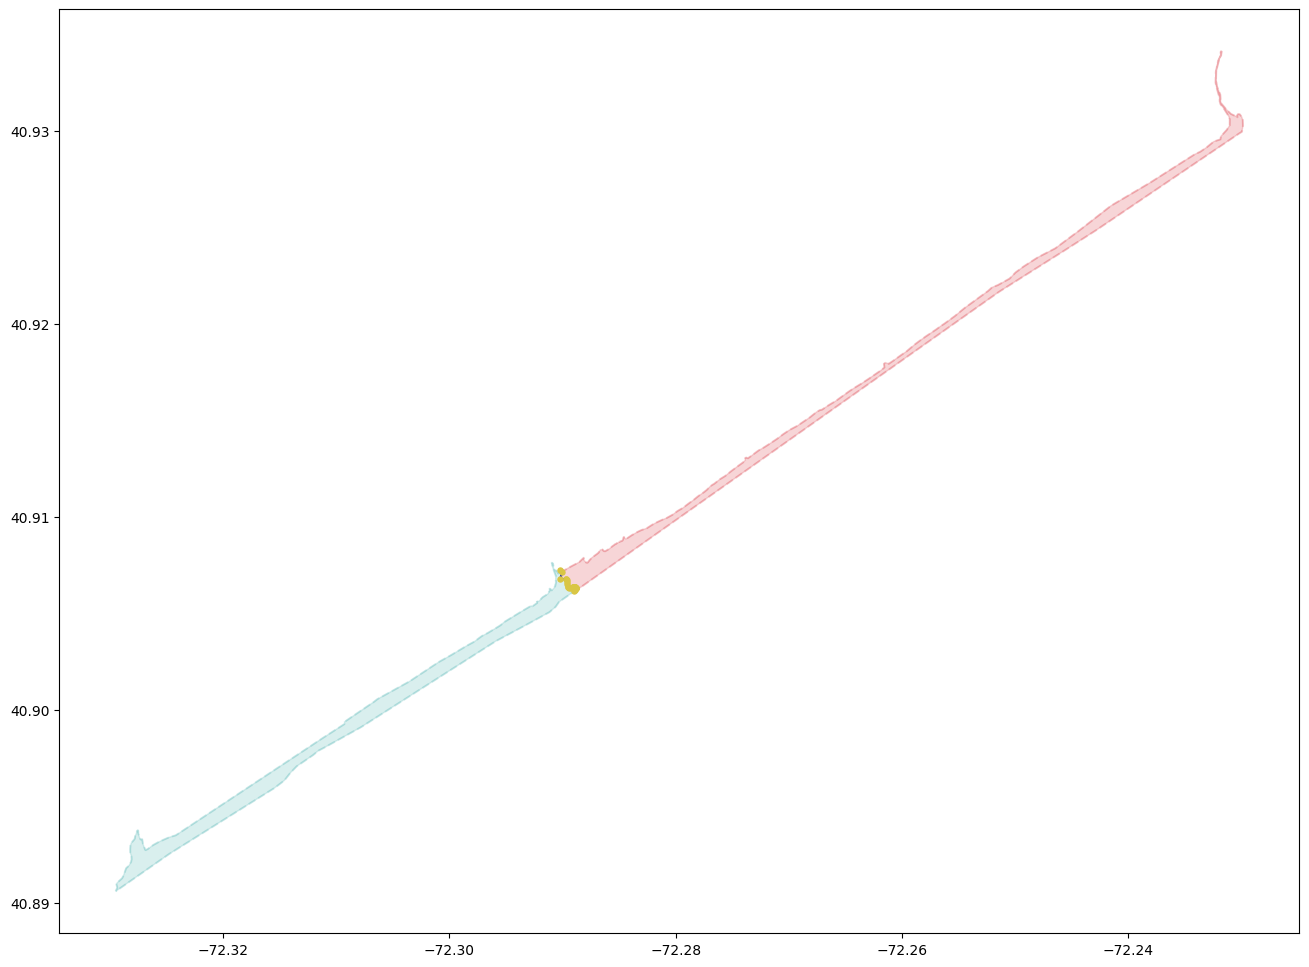

Passed 199 of 200. Total in set: 622
Above FAILED!
Expected shape: GEOMETRYCOLLECTION (POLYGON ((-73.3138397 40.6349564, -73.3140614 40.6349807, -73.3141886 40.6350416, -73.3138397 40.6349564)), LINESTRING (-73.3170802 40.6355476, -73.3168666 40.6355346), LINESTRING (-73.3168666 40.6355346, -73.3166845 40.6353826), LINESTRING (-73.3166845 40.6353826, -73.3160051 40.6352876), LINESTRING (-73.3143782 40.6350879, -73.3141886 40.6350416), LINESTRING (-73.3138397 40.6349564, -73.3133768 40.6348434), LINESTRING (-73.3133768 40.6348434, -73.3131856 40.6347946), LINESTRING (-73.3131856 40.6347946, -73.3123152 40.6345723), LINESTRING (-73.3123152 40.6345723, -73.3119986 40.6346202))
Returned shape: MULTILINESTRING ((-73.3170802 40.6355476, -73.3168666 40.6355346, -73.3166845 40.6353826, -73.3160051 40.6352876), (-73.3143782 40.6350879, -73.3141886 40.6350416), (-73.3138397 40.6349564, -73.3140614 40.6349807, -73.3141886 40.6350416), (-73.3141886 40.6350416, -73.3138397 40.6349564), (-73.3138397

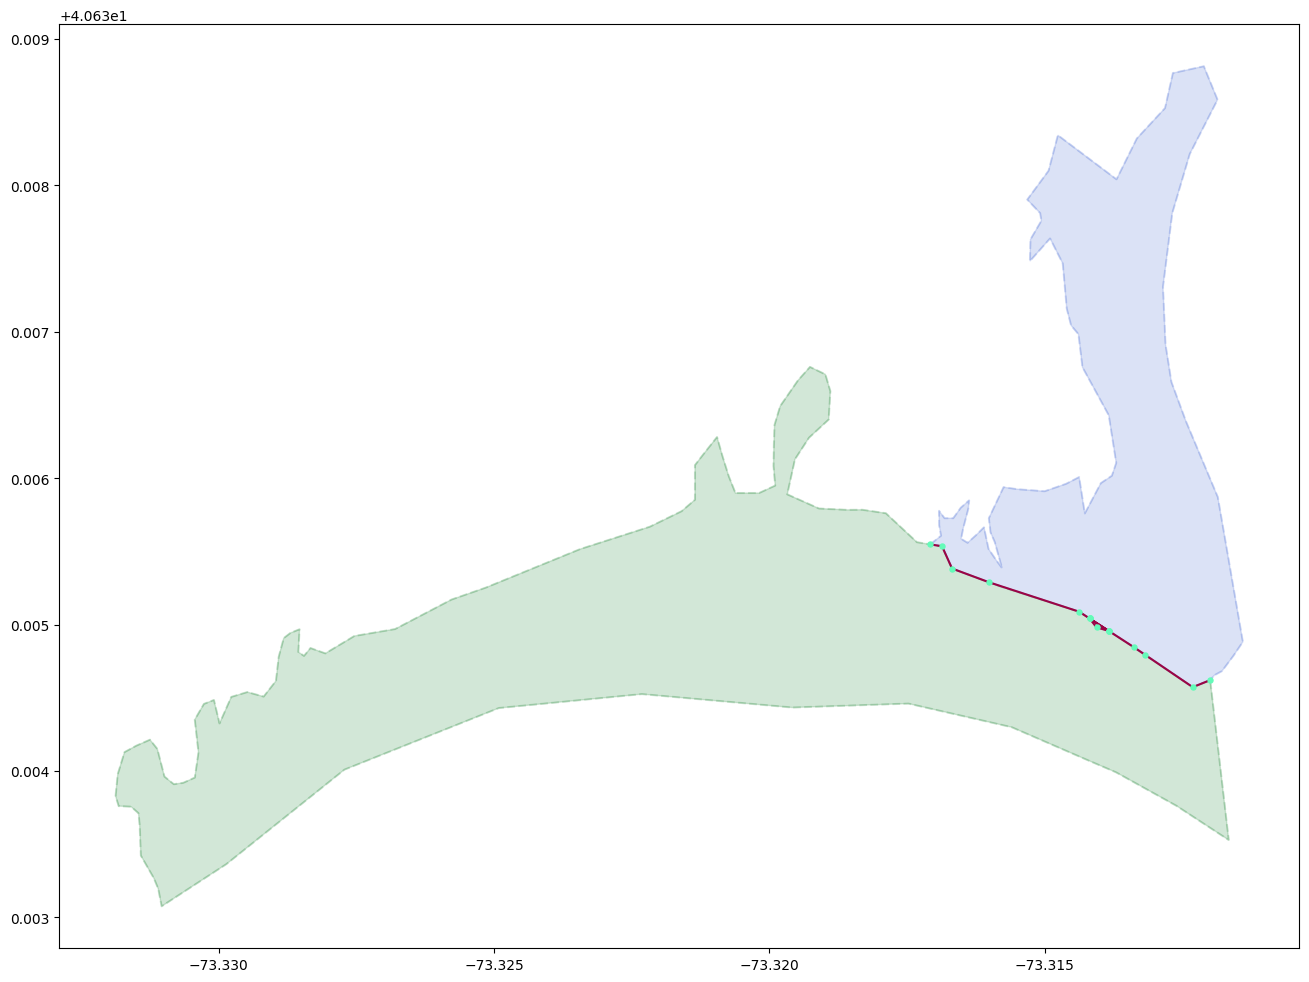

Above FAILED!
Expected shape: GEOMETRYCOLLECTION (POLYGON ((-73.3140614 40.6349807, -73.3141886 40.6350416, -73.3138397 40.6349564, -73.3140614 40.6349807)), LINESTRING (-73.3119986 40.6346202, -73.3123152 40.6345723), LINESTRING (-73.3123152 40.6345723, -73.3131856 40.6347946), LINESTRING (-73.3131856 40.6347946, -73.3133768 40.6348434), LINESTRING (-73.3133768 40.6348434, -73.3138397 40.6349564), LINESTRING (-73.3141886 40.6350416, -73.3143782 40.6350879), LINESTRING (-73.3160051 40.6352876, -73.3166845 40.6353826), LINESTRING (-73.3166845 40.6353826, -73.3168666 40.6355346), LINESTRING (-73.3168666 40.6355346, -73.3170802 40.6355476))
Returned shape: MULTILINESTRING ((-73.3170802 40.6355476, -73.3168666 40.6355346, -73.3166845 40.6353826, -73.3160051 40.6352876), (-73.3143782 40.6350879, -73.3141886 40.6350416), (-73.3138397 40.6349564, -73.3140614 40.6349807, -73.3141886 40.6350416), (-73.3141886 40.6350416, -73.3138397 40.6349564), (-73.3138397 40.6349564, -73.3133768 40.6348434, 

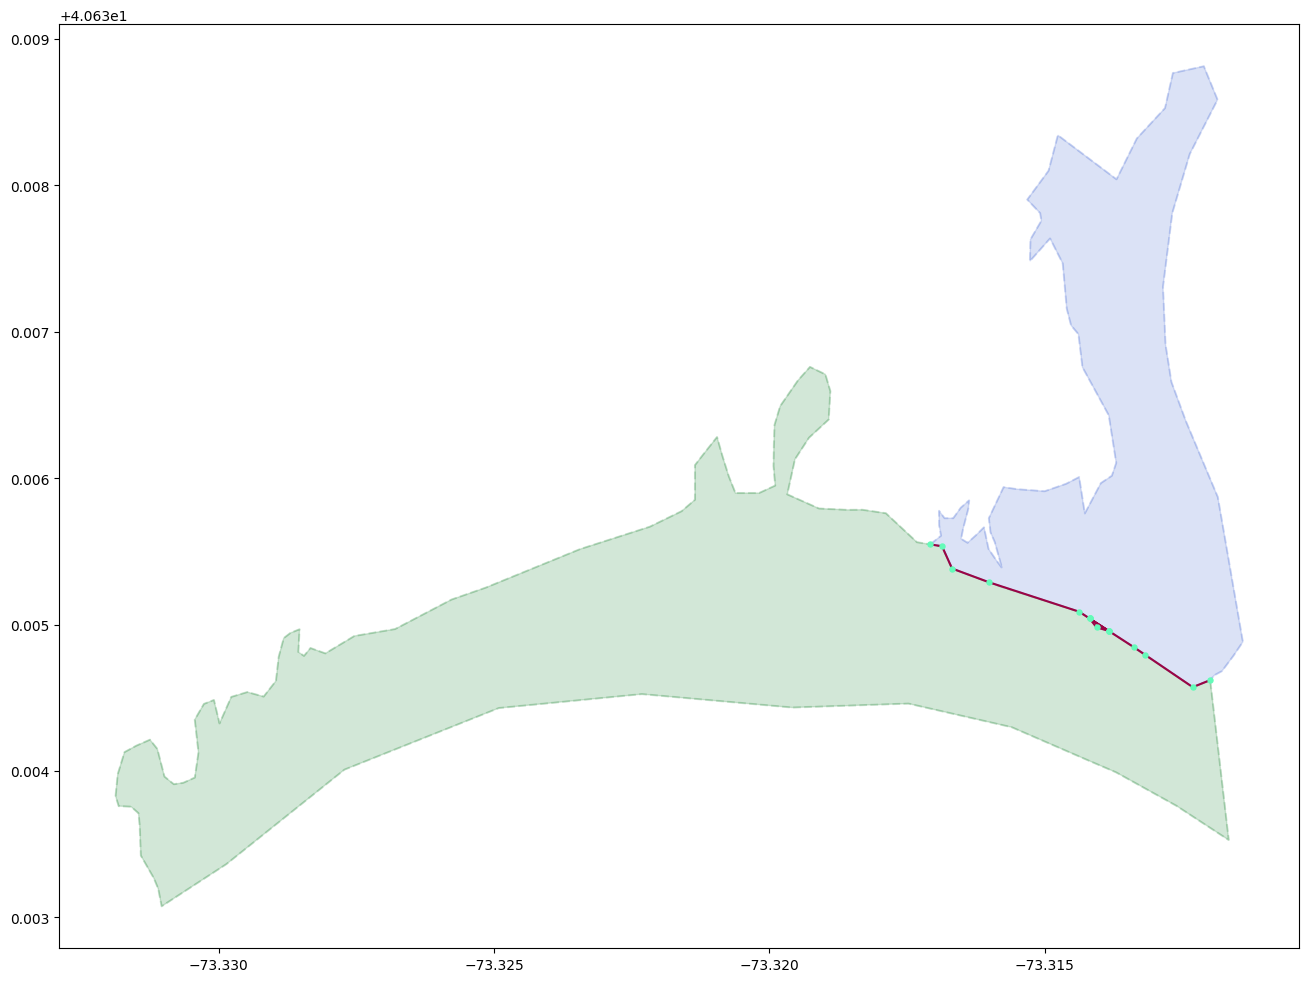

Passed 297 of 300. Total in set: 622
Passed 397 of 400. Total in set: 622
Passed 497 of 500. Total in set: 622
Passed 597 of 600. Total in set: 622
Above FAILED!
Expected shape: GEOMETRYCOLLECTION (POLYGON ((-72.2887901 40.9063331, -72.2888178 40.906303, -72.28886690743009 40.90627321004601, -72.2887901 40.9063331)), POLYGON ((-72.2889372 40.9063488, -72.2889156 40.9063496, -72.2887901 40.9063331, -72.2889372 40.9063488)), POLYGON ((-72.28911792394685 40.90633055195353, -72.2890568 40.9063446, -72.2890441 40.9063451, -72.28911792394685 40.90633055195353)), LINESTRING (-72.2889372 40.9063488, -72.2890441 40.9063451), LINESTRING (-72.2895048 40.9063599, -72.2895261 40.9063851), LINESTRING (-72.289589 40.9066402, -72.2896292 40.9067124), LINESTRING (-72.2896292 40.9067124, -72.2896585 40.9067649), LINESTRING (-72.2896585 40.9067649, -72.2896989 40.9067765), LINESTRING (-72.2896989 40.9067765, -72.290187 40.9067661), LINESTRING (-72.290187 40.9067661, -72.2900657 40.9071531), LINESTRING (-

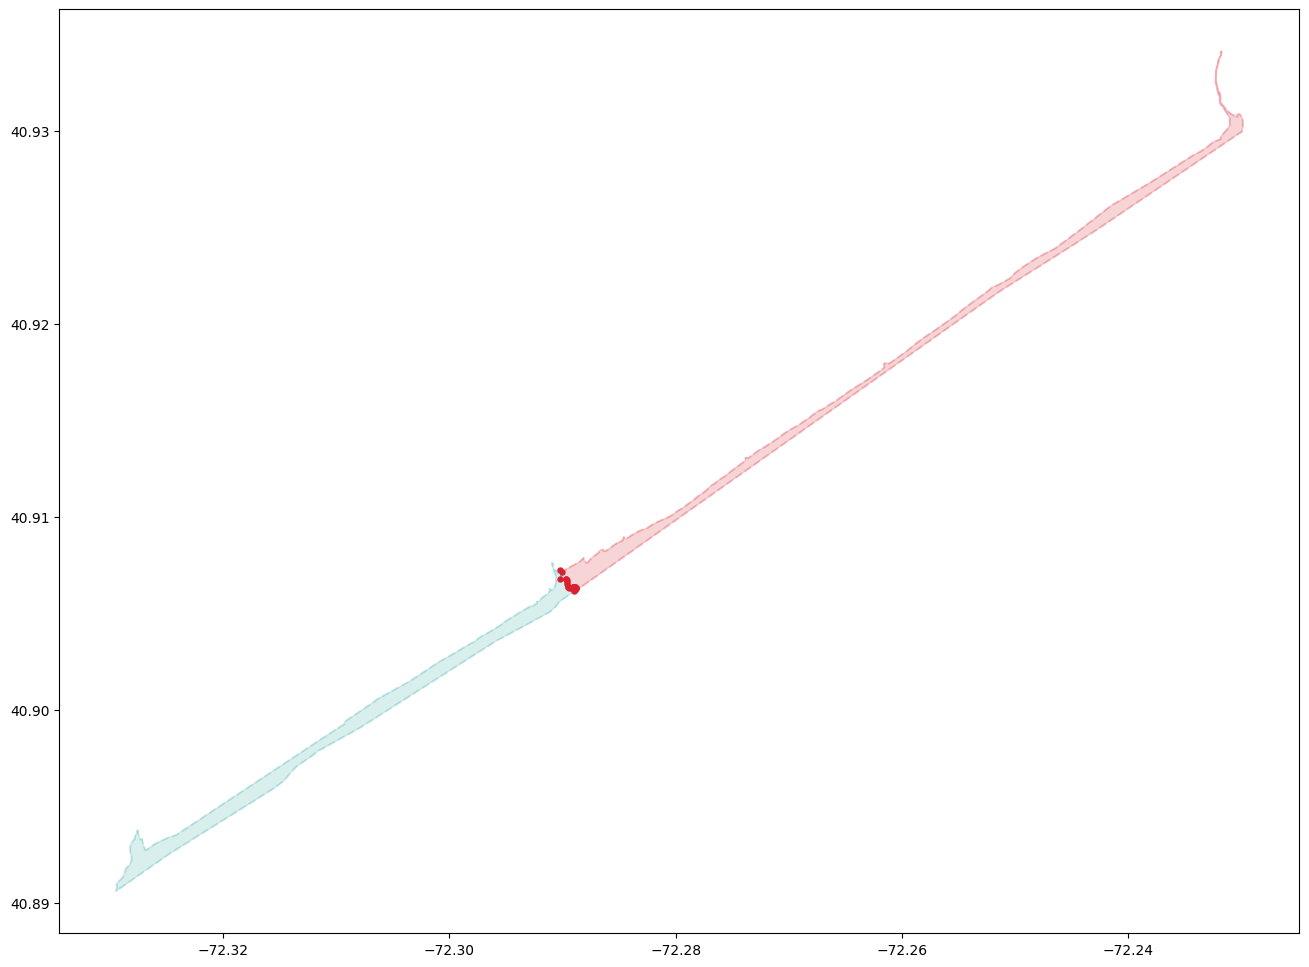

Done. Passed: 618 of 622.


In [6]:
total = 0
passed = 0
stats_df = pd.DataFrame(columns=['decomp', 'nbr_recieved_chks', 'nbr_total_chks', 'total_time', "dataset", "context", "predicate"])

def evaluate_dataset(data, plot, total, passed, delta_size=None):
    for g1, g2 in data:
        if delta_size != None:
            set_max_num_delta(delta_size)
        #is_intersecting, intersect_points = binary_intersection(g1, g2)
        _, b1 = fpd.compress(g1)
        _, b2 = fpd.compress(g2)
        exp_boolean = shapely.intersects(g1, g2)
        #is_intersecting = chunk_bbox_is_intersecting((b1, b2), exp_boolean, True)
        stats_is_intersection, is_intersecting = chunk_bbox_is_intersecting((b1, b2), exp_boolean, True, get_stats=True)
        exp_shape = shapely.intersection(g1, g2)
        stats_intersection, intersection = chunk_bbox_intersection((b1, b2), exp_boolean, True, get_stats=True)
        if plot and exp_boolean: # Now only plotting intersecting shapes
            if False: # Plot chunks?
                plot_chunks_bounds(b1, True, avoid_show=True)
                plot_chunks_bounds(b2, True, avoid_create_frame=True, avoid_show=True)
            geoms = (g1, g2)
            for g in geoms:
                plot_geometry(g, SHOW_GEOMETRIES)
                plot_geometry_bbox(g, SHOW_BOUNDING_BOXES)
                plot_coordinates(g, SHOW_COORDINATES)
            
            plot_common_bbox(geoms, SHOW_COMMON_BOUNDING_BOX)
            #plot_intersecting_points(intersect_points, legends, SHOW_INTERSECTING_POINTS)

            if SHOW_COORDINATES or SHOW_GEOMETRIES or SHOW_INTERSECTING_POINTS or SHOW_COMMON_BOUNDING_BOX or SHOW_BOUNDING_BOXES:
                plt.title("Intersection Plot: " + ('True' if is_intersecting else 'False'))
                plt.show()


            PLOT_RESULTING_INTERSECTION = True
            if is_intersecting and PLOT_RESULTING_INTERSECTION:
                create_canvas(zoom=1.1, no_frame=True)
                for g in geoms:
                    plot_geometry(g, SHOW_GEOMETRIES, alpha=0.2, fill_alpha=0.2)
                    plot_coordinates(g, SHOW_COORDINATES, size=1)
                
                plot_geometry(intersection, fill_alpha=0.6, hatch=True)
                plot_coordinates(intersection, size=10)
                #plt.title("Intersecting Shape")
                plt.show()

        total += 1
     
        if is_intersecting == exp_boolean and exp_shape.equals(intersection):
            passed += 1
        #     if not exp_shape.is_empty:
        #         create_canvas()
        #         plot_geometry(g1,alpha=0.2)
        #         plot_geometry(g2,alpha=0.2)
        #         #plot_geometry(exp_shape, solid=False)
        #         plot_geometry(intersection)
        #         plot_coordinates(intersection)
        #         plt.show()
            
        else:

            print("Above FAILED!")
            print('Expected shape:', exp_shape)
            print('Returned shape:', intersection)
            create_canvas()
            plot_geometry(g1,alpha=0.2, fill_alpha=0.2, solid=False)
            plot_geometry(g2,alpha=0.2, fill_alpha=0.2, solid=False)
            #plot_geometry(exp_shape, solid=False)
            plot_geometry(intersection, fill_alpha=1.0)
            plot_coordinates(intersection)
            plt.show()
        if total % 100 == 0:
            print(f"Passed {passed} of {total}. Total in set: {len(data)}")
    return total, passed

#total, passed = evaluate_dataset(manual_data, False, total, passed, "Manual") # Second param: PLOT?

#total, passed = evaluate_dataset(special_cases, False, total, passed, "Special Case")
# total, passed = evaluate_dataset(world_data, False, total, passed, "World")
# total, passed = evaluate_dataset(lund_data, False, total, passed, "Lund")
#total, passed = evaluate_dataset(waterways_data, False, total, passed, "Waterways")
#total, passed = evaluate_dataset(sweden_data, False, total, passed, "Sweden")
total, passed = evaluate_dataset(new_york_data, False, total, passed, "NewYork")


print(f'Done. Passed: {passed} of {total}.')
#POLYGON ((6.5 6.5, 8 5, 4 4, 6.5 6.5))